In [20]:
pip install python.socketio

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install -U fxcmpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import fxcmpy
import datetime as dt

In [2]:
token = "0371bfab0e4111afd7f079b5ded44b91f9318c5c"

In [3]:
conn = fxcmpy.fxcmpy(access_token=token, log_level='error', log_file=None)

In [4]:
def on_tick(data, df):
    print(df)
    

In [5]:
subscribe=conn.subscribe_market_data("XAU/USD",(on_tick,))

                             Bid      Ask     High      Low
2022-05-20 02:10:37.919  1837.71  1838.16  1844.84  1837.13
2022-05-20 02:10:38.906  1837.72  1838.14  1844.84  1837.13
                             Bid      Ask     High      Low
2022-05-20 02:10:37.919  1837.71  1838.16  1844.84  1837.13
2022-05-20 02:10:38.906  1837.72  1838.14  1844.84  1837.13
2022-05-20 02:10:39.645  1837.75  1838.14  1844.84  1837.13
                             Bid      Ask     High      Low
2022-05-20 02:10:37.919  1837.71  1838.16  1844.84  1837.13
2022-05-20 02:10:38.906  1837.72  1838.14  1844.84  1837.13
2022-05-20 02:10:39.645  1837.75  1838.14  1844.84  1837.13
2022-05-20 02:10:39.886  1837.67  1838.14  1844.84  1837.13


In [6]:
conn.unsubscribe_market_data("XAU/USD")

In [7]:
conn.get_candles('XAU/USD', period='m15', number=3)  # daily data


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-05-20 01:30:00,1838.26,1839.12,1839.57,1837.80,1838.56,1839.42,1839.88,1838.11,3710
2022-05-20 01:45:00,1839.11,1837.97,1839.15,1837.55,1839.42,1838.33,1839.46,1837.95,2745
2022-05-20 02:00:00,1837.95,1837.78,1838.58,1837.13,1838.33,1838.22,1838.92,1837.52,1907


In [8]:
avgrr=(1815.6+1817.1)/2
avgrr

1816.35

In [101]:
df = conn.get_candles('XAU/USD', period='m30',
                       columns=['asks'], number=500)

In [102]:
df.reset_index(drop=False, inplace=True)
df

,date,askopen,askclose,askhigh,asklow
0,2022-05-06 02:00:00,1870.38,1871.96,1872.34,1869.10
1,2022-05-06 02:30:00,1871.98,1875.82,1876.35,1871.69
2,2022-05-06 03:00:00,1875.83,1876.01,1877.30,1875.75
3,2022-05-06 03:30:00,1876.02,1877.13,1877.65,1875.49
4,2022-05-06 04:00:00,1877.17,1876.92,1877.51,1876.42
...,...,...,...,...,...
495,2022-05-20 15:30:00,1844.10,1845.86,1846.83,1843.15
496,2022-05-20 16:00:00,1845.87,1843.98,1846.60,1843.02
497,2022-05-20 16:30:00,1843.98,1840.47,1844.79,1840.44
498,2022-05-20 17:00:00,1840.51,1841.70,1842.69,1839.81


In [72]:
import plotly.graph_objects as go
import pandas as pd

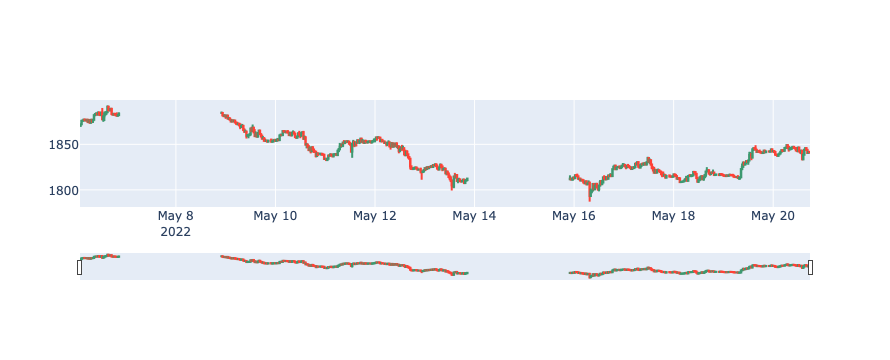

In [105]:
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['askopen'], high=df['askhigh'],
                low=df['asklow'], close=df['askclose'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

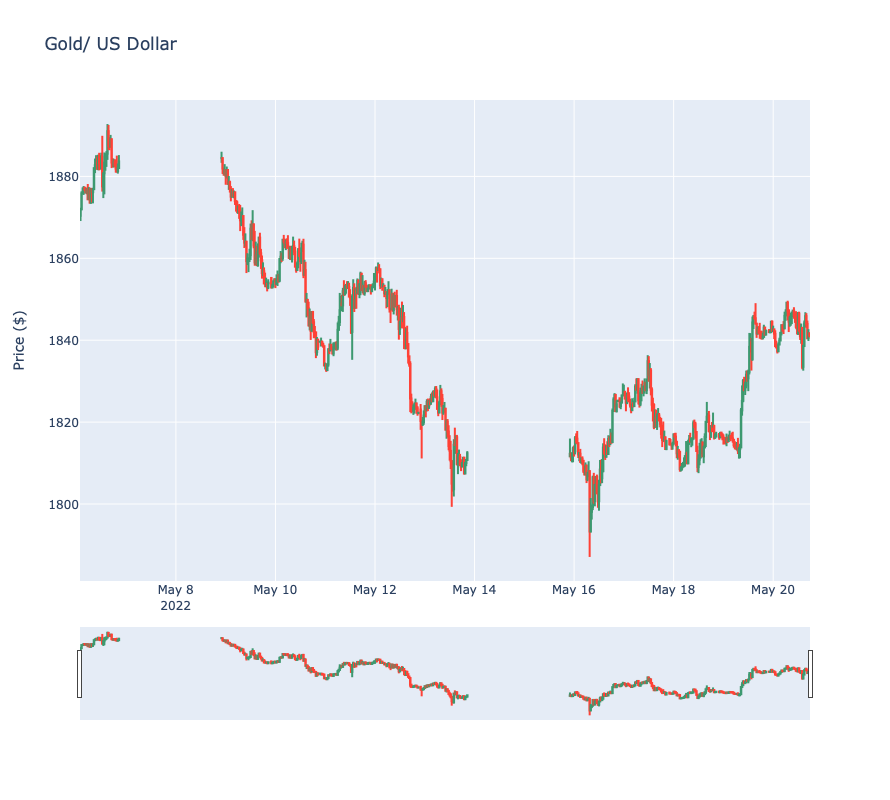

In [107]:
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['askopen'], high=df['askhigh'],
                low=df['asklow'], close=df['askclose'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=True, width=900, 
                  height=800, title="Gold/ US Dollar",
                  yaxis_title='Price ($)')
fig.show()

In [56]:
# #criteria of shooting star
# def shooting_star(data,lower_bound,body_size):

#     df=data.copy()

#     #open>close,red color
#     df['condition1']=np.where(df['askopen']>=df['askclose'],1,0)

#     #a candle with little or no lower wick
#     df['condition2']=np.where(
#         (df['askclose']-df['asklow'])<lower_bound*abs(
#             df['askclose']-df['askopen']),1,0)

#     #a candle with a small lower body
#     df['condition3']=np.where(abs(
#         df['askopen']-df['askclose'])<abs(
#         np.mean(df['askopen']-df['askclose']))*body_size,1,0)

#     #a long upper wick that is at least two times the size of the lower body
#     df['condition4']=np.where(
#         (df['askhigh']-df['askopen'])>=2*(
#             df['askopen']-df['askclose']),1,0)

#     #price uptrend
#     df['condition5']=np.where(
#         df['askclose']>=df['askclose'].shift(1),1,0)
#     df['condition6']=np.where(
#         df['askclose'].shift(1)>=df['askclose'].shift(2),1,0)

#     #the next candle's high must stay 
#     #below the high of the shooting star 
#     df['condition7']=np.where(
#         df['askhigh'].shift(-1)<=df['askhigh'],1,0)

#     #the next candle's close below 
#     #the close of the shooting star
#     df['condition8']=np.where(
#         df['askclose'].shift(-1)<=df['askclose'],1,0)
    
#     return df


In [58]:
import numpy as np

In [60]:
# #signal generation

# #there are eight criteria according to investopedia
# def signal_generation(df,method,
#                       lower_bound=0.2,body_size=0.5,
#                       stop_threshold=0.05,
#                       holding_period=7):

#     #get shooting star conditions
#     data=method(df,lower_bound,body_size)

#     #shooting star should suffice all conditions
#     #in practise,you may find the definition too rigid
#     #its important to relax a bit on the body size
#     data['signals']=data['condition1']*data[
#         'condition2']*data['condition3']*data[
#         'condition4']*data['condition5']*data[
#         'condition6']*data['condition7']*data[
#         'condition8']

#     #shooting star is a short signal
#     data['signals']=-data['signals']

#     #get shooting star conditions
#     data=method(df,lower_bound,body_size)

#     #shooting star should suffice all conditions
#     #in practise,you may find the definition too rigid
#     #its important to relax a bit on the body size
#     data['signals']=data['condition1']*data[
#         'condition2']*data['condition3']*data[
#         'condition4']*data['condition5']*data[
#         'condition6']*data['condition7']*data[
#         'condition8']

#     #shooting star is a short signal
#     data['signals']=-data['signals']

In [75]:
df.isna().sum()

askopen     0
askclose    0
askhigh     0
asklow      0
dtype: int64

In [119]:
# for down trends
# Shooting star

def Revsignal1(df):
    #df.dropna()
    #df.reset_index(drop=True, inplace=True)
    
    length = len(df)
    high = list(df['askhigh'])
    low = list(df['asklow'])
    close = list(df['askclose'])
    open = list(df['askopen'])
    signal = [0] * length
    highdiff = [0] * length
    lowdiff = [0] * length
    bodydiff = [0] * length
    ratio1 = [0] * length
    ratio2 = [0] * length
    
    for row in range(0, length):
        
        highdiff[row] = high[row]-max(open[row],close[row])
        #print(highdiff[row])
        bodydiff[row] = abs(open[row]-close[row])
        if bodydiff[row]<0.002:
            bodydiff[row]=0.002
        lowdiff[row] = min(open[row],close[row])-low[row]
        ratio1[row] = highdiff[row]/bodydiff[row]
        #print(ratio1[row])
        ratio2[row] = lowdiff[row]/bodydiff[row]
    
    #shooting star
        if (ratio1[row]>3 and lowdiff[row]<0.28*highdiff[row] and bodydiff[row]>0.03 ):
            signal[row] = 1
    # hammer candlestick
        elif (ratio2[row]>2.8 and highdiff[row]<0.25*lowdiff[row] and bodydiff[row]>0.03 ):
            signal[row]=2
    return signal
        

df['signal1'] = Revsignal1(df)
df[df['signal1']==2]

,date,askopen,askclose,askhigh,asklow,signal1
11,2022-05-06 07:30:00,1876.94,1876.13,1877.15,1873.62,2
12,2022-05-06 08:00:00,1876.15,1876.89,1877.20,1873.41,2
25,2022-05-06 14:30:00,1885.03,1885.55,1886.19,1882.32,2
52,2022-05-09 05:00:00,1873.97,1873.65,1874.07,1871.40,2
146,2022-05-11 04:30:00,1839.08,1839.17,1839.39,1837.72,2
147,2022-05-11 05:00:00,1839.15,1839.37,1839.59,1837.50,2
169,2022-05-11 16:00:00,1854.50,1853.59,1854.87,1851.04,2
187,2022-05-12 01:00:00,1857.55,1857.32,1857.55,1854.06,2
200,2022-05-12 07:30:00,1847.69,1847.56,1847.94,1844.20,2
207,2022-05-12 11:00:00,1847.64,1847.93,1848.41,1844.82,2


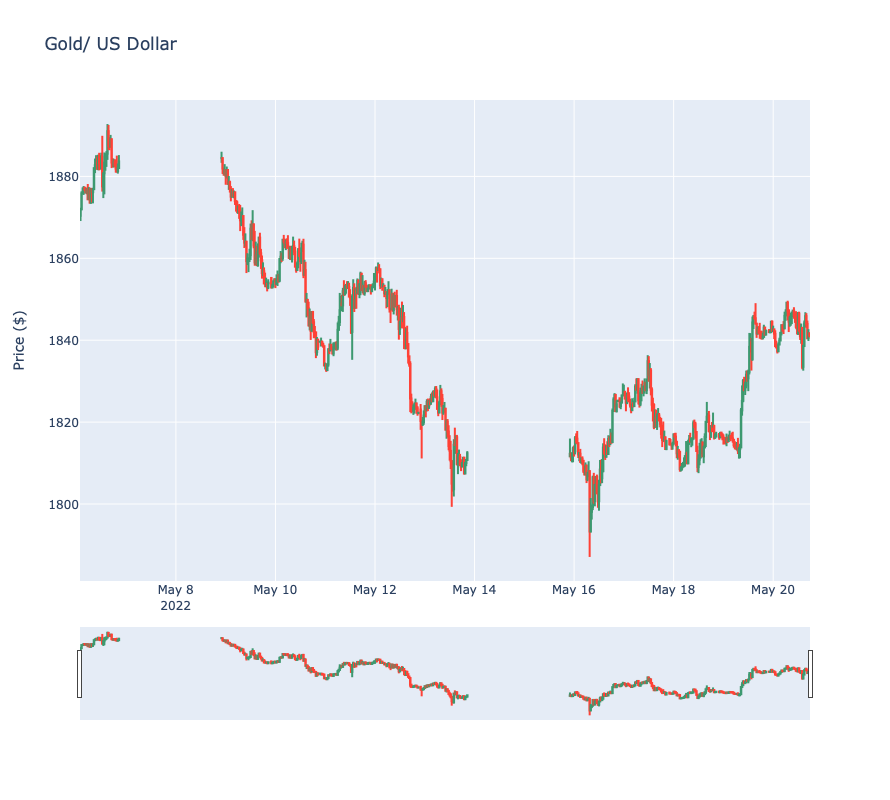

In [120]:
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['askopen'], high=df['askhigh'],
                low=df['asklow'], close=df['askclose'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=True, width=900, 
                  height=800, title="Gold/ US Dollar",
                  yaxis_title='Price ($)')
fig.show()

In [129]:
df.index

RangeIndex(start=0, stop=500, step=1)

## Visualizing signals 